# Guidebook on how to not get divorced


 ### **How much agency do we have over our relationships?** ###
 


 ***Are internal-relationship factors (communication,trust,conflict) better predictors of divorce than structural variables (income, number of children etc)***

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
divorce = pd.read_csv('divorce_df.csv')
divorce.head()
divorce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age_at_marriage            5000 non-null   int64  
 1   marriage_duration_years    5000 non-null   int64  
 2   num_children               5000 non-null   int64  
 3   education_level            5000 non-null   object 
 4   employment_status          5000 non-null   object 
 5   combined_income            5000 non-null   int64  
 6   religious_compatibility    5000 non-null   object 
 7   cultural_background_match  5000 non-null   int64  
 8   communication_score        5000 non-null   float64
 9   conflict_frequency         5000 non-null   int64  
 10  conflict_resolution_style  5000 non-null   object 
 11  financial_stress_level     5000 non-null   float64
 12  mental_health_issues       5000 non-null   int64  
 13  infidelity_occurred        5000 non-null   int64

In [45]:
divorce.isnull().sum()

age_at_marriage              0
marriage_duration_years      0
num_children                 0
education_level              0
employment_status            0
combined_income              0
religious_compatibility      0
cultural_background_match    0
communication_score          0
conflict_frequency           0
conflict_resolution_style    0
financial_stress_level       0
mental_health_issues         0
infidelity_occurred          0
counseling_attended          0
social_support               0
shared_hobbies_count         0
marriage_type                0
pre_marital_cohabitation     0
domestic_violence_history    0
trust_score                  0
divorced                     0
dtype: int64

In [46]:
#Create two seperate dataframes for internal and structural factors 

internal_factors = divorce[
    [
        'communication_score',
        'conflict_frequency',
        'conflict_resolution_style',
        'infidelity_occurred',
        'counseling_attended',
        'social_support',
        'shared_hobbies_count',
        'domestic_violence_history',
        'trust_score',
        'divorced'
    ]
]

structural_factors = divorce[
    [
        'age_at_marriage',
        'marriage_duration_years',
        'num_children',
        'education_level',
        'combined_income',
        'cultural_background_match',
        'religious_compatibility',
        'mental_health_issues',
        'marriage_type',
        'social_support',
        'employment_status',
        'divorced'
    ]
]


## Descriptive Statistics



#### Internal Factors on divorce

In [47]:
##Split columns into categorical binary,continuous and categorical 

internal_binary_cols = [
    'infidelity_occurred',
    'counseling_attended', 
    'domestic_violence_history'
]



internal_continuous_cols = [
    'communication_score',
    'conflict_frequency', 
    'shared_hobbies_count',
    'trust_score'
]

internal_cat_cols = [
    'conflict_resolution_style'
]


In [48]:
### Internal factors descriptive Statistics
internal_factors[internal_binary_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
infidelity_occurred,5000.0,0.1490,0.356124,0.0,0.0,0.0,0.0,1.0
counseling_attended,5000.0,0.2404,0.427369,0.0,0.0,0.0,0.0,1.0
domestic_violence_history,5000.0,0.0504,0.218791,0.0,0.0,0.0,0.0,1.0


In [49]:
internal_factors[internal_continuous_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
communication_score,5000.0,6.040507,1.963349,1.0,4.661929,6.058246,7.426862,10.0
conflict_frequency,5000.0,2.008000,1.412351,0.0,1.000000,2.000000,3.000000,9.0
shared_hobbies_count,5000.0,2.972600,1.711735,0.0,2.000000,3.000000,4.000000,10.0
trust_score,5000.0,6.030525,1.932922,1.0,4.702663,6.034343,7.372830,10.0


In [50]:
divorce[internal_cat_cols].describe(include='object')

,conflict_resolution_style
count,5000
unique,4
top,Collaborative
freq,2028


#### Visualisations for internal factors

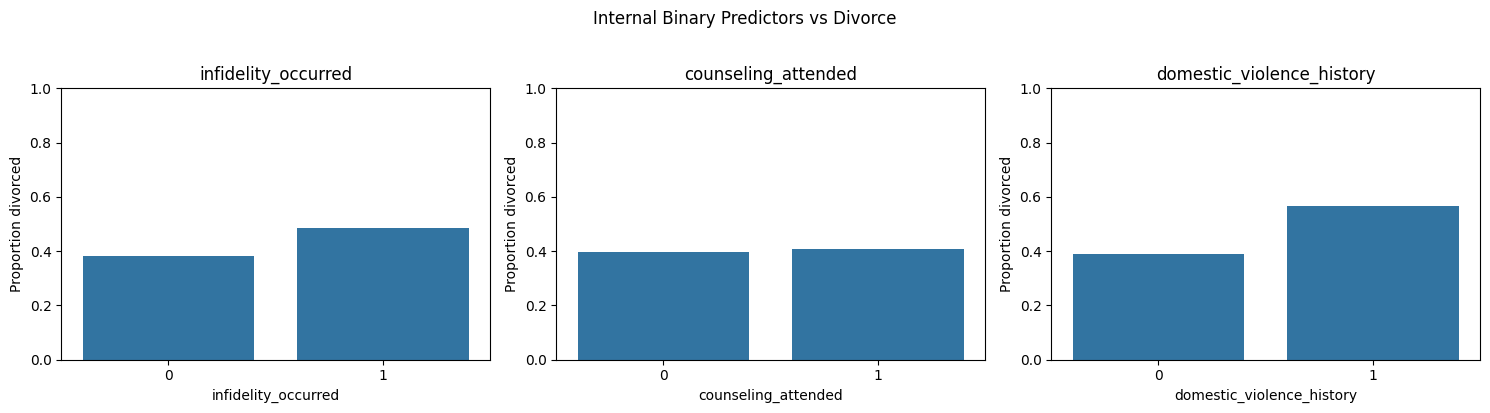

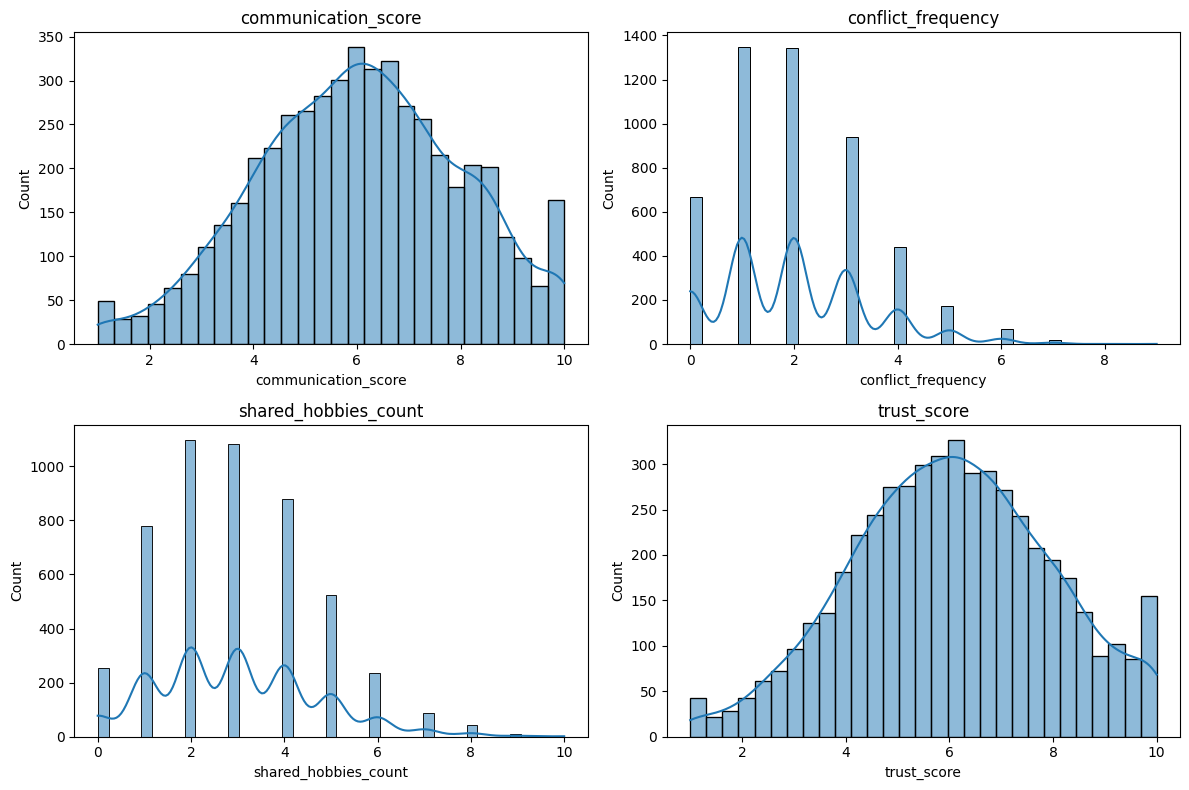

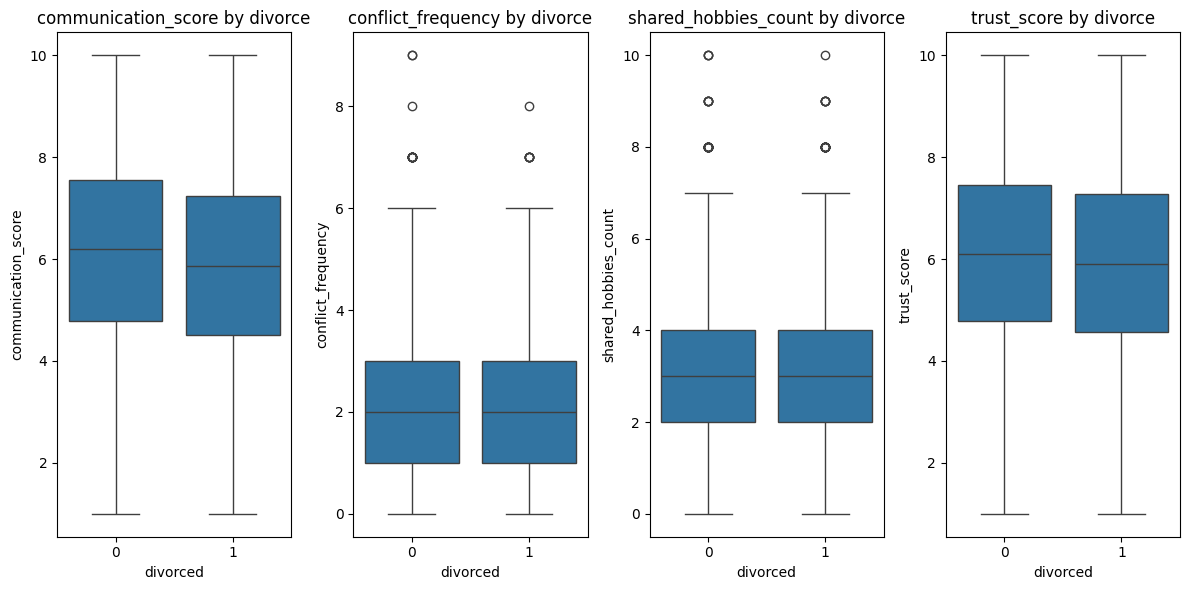

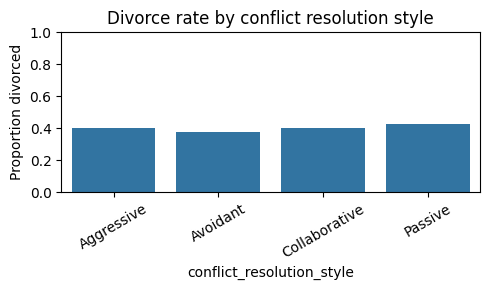

In [51]:
# Side-by-side bar plots
fig, axes = plt.subplots(1, len(internal_binary_cols), figsize=(5*len(internal_binary_cols), 4))

if len(internal_binary_cols) == 1:
    axes = [axes]

for i, col in enumerate(internal_binary_cols):
    rate_df = internal_factors.groupby(col)['divorced'].mean().reset_index()
    sns.barplot(data=rate_df, x=col, y='divorced', ax=axes[i])
    axes[i].set_ylabel('Proportion divorced')
    axes[i].set_title(f'{col}')
    axes[i].set_ylim(0, 1)

plt.suptitle('Internal Binary Predictors vs Divorce', y=1.02)
plt.tight_layout()
plt.show()

## Histograms for continuous variables
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # adjust to 2x2
axes = axes.flatten()

for i, col in enumerate(internal_continuous_cols):
    sns.histplot(data=internal_factors, x=col, kde=True, ax=axes[i])
    axes[i].set_title(col)


plt.tight_layout()
plt.show()

## Boxplots for continuous variables by divorce status

fig, axes = plt.subplots(1, 4, figsize=(12, 6))
axes = axes.flatten()

for i, col in enumerate(internal_continuous_cols):
    sns.boxplot(data=internal_factors, x='divorced', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by divorce')


plt.tight_layout()
plt.show()

## Divorce rate by conflict resolution style (categriorical variable)
rate_conflict = (divorce.groupby('conflict_resolution_style')['divorced'].mean().reset_index())

plt.figure(figsize=(5, 3))
sns.barplot(data=rate_conflict,
            x='conflict_resolution_style',
            y='divorced')
plt.ylabel('Proportion divorced')
plt.title('Divorce rate by conflict resolution style')
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### What does this show - wrrite up needed here

In [52]:
structural_binary_cols = [
    'mental_health_issues',
    'cultural_background_match',
    'religious_compatibility'
]

structural_continuous_cols = [
    'age_at_marriage',
    'marriage_duration_years',
    'num_children',
    'combined_income',
    'social_support'
]

structural_cat_cols = [
    'education_level',
    'employment_status',
    'marriage_type',
    'religious_compatibility',
    'cultural_background_match'
]

In [53]:
structural_factors[structural_binary_cols].describe()

,mental_health_issues,cultural_background_match
count,5000.000000,5000.000000
mean,0.203800,0.755400
std,0.402862,0.429893
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [54]:
structural_factors[structural_continuous_cols].describe()

,age_at_marriage,marriage_duration_years,num_children,combined_income,social_support
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,27.583600,9.171000,1.552800,60220.078400,5.966853
std,4.855978,8.848266,1.247527,19662.080982,1.965504
min,18.000000,1.000000,0.000000,10000.000000,1.000000
25%,24.000000,2.000000,1.000000,46666.000000,4.597007
50%,28.000000,6.000000,1.000000,60196.000000,6.010716
75%,31.000000,13.000000,2.000000,73666.500000,7.328916
max,45.000000,40.000000,6.000000,126909.000000,10.000000


In [55]:
structural_factors[structural_cat_cols].describe()

,cultural_background_match
count,5000.000000
mean,0.755400
std,0.429893
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


#### Visualisations for structural  factors

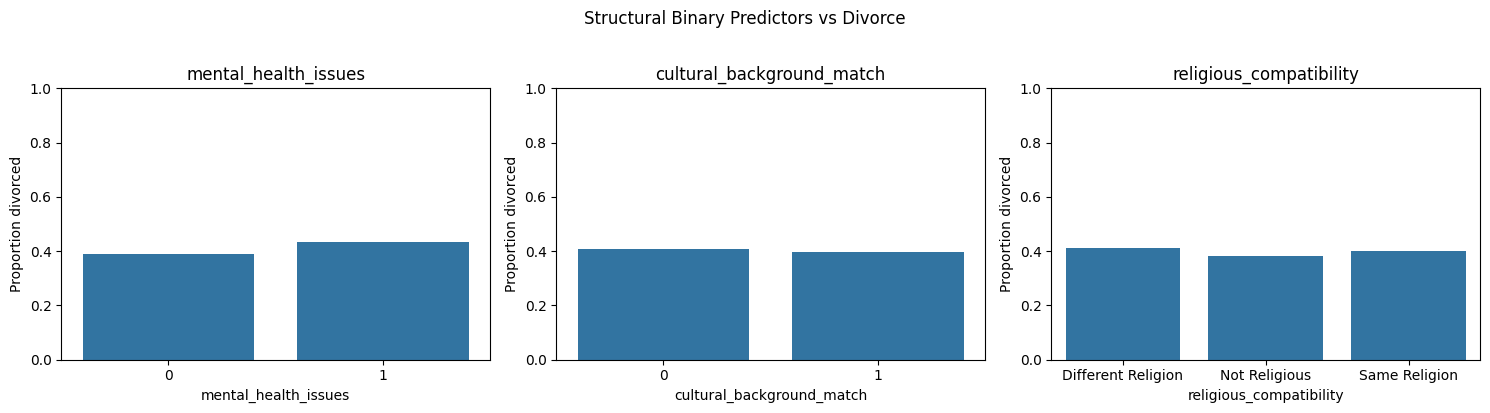

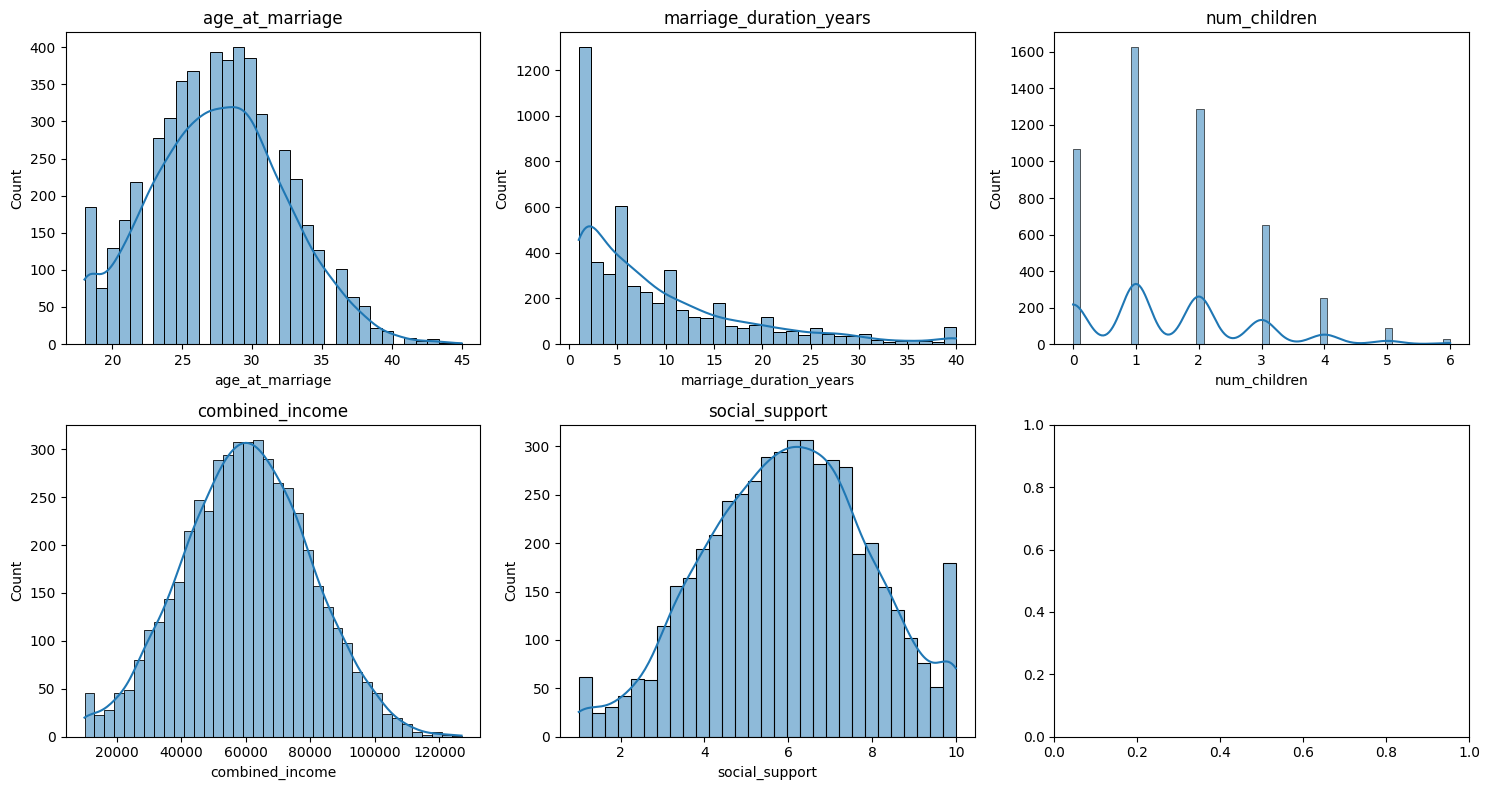

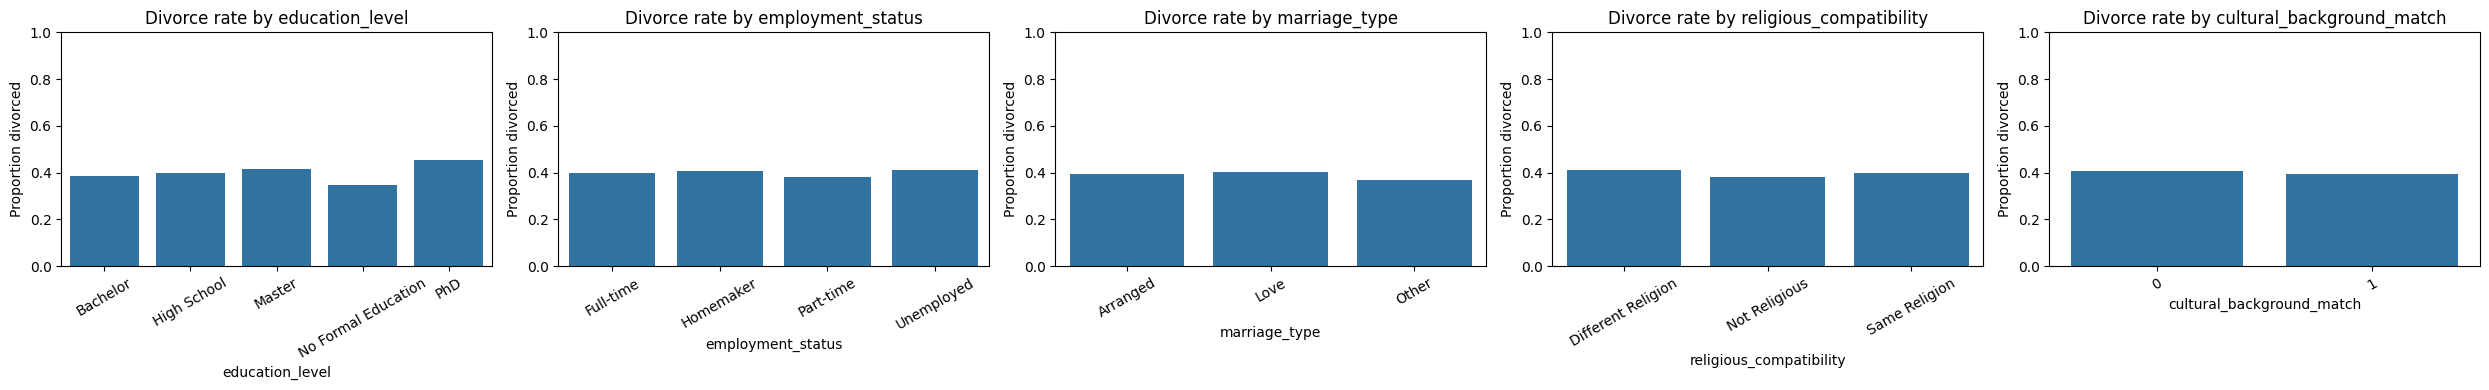

In [56]:
# Side-by-side bar plots
fig, axes = plt.subplots(1, len(structural_binary_cols), figsize=(5*len(structural_binary_cols), 4))

if len(structural_binary_cols) == 1:
    axes = [axes]

for i, col in enumerate(structural_binary_cols):
    rate_df = structural_factors.groupby(col)['divorced'].mean().reset_index()
    sns.barplot(data=rate_df, x=col, y='divorced', ax=axes[i])
    axes[i].set_ylabel('Proportion divorced')
    axes[i].set_title(f'{col}')
    axes[i].set_ylim(0, 1)

plt.suptitle('Structural Binary Predictors vs Divorce', y=1.02)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(structural_continuous_cols):
    sns.histplot(data=structural_factors, x=col, kde=True, ax=axes[i])
    axes[i].set_title(col)


plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, len(structural_cat_cols), figsize=(5*len(structural_cat_cols), 4))

for i, col in enumerate(structural_cat_cols):
    rate_df = divorce.groupby(col)['divorced'].mean().reset_index()
    sns.barplot(data=rate_df, x=col, y='divorced', ax=axes[i])
    axes[i].set_ylabel('Proportion divorced')
    axes[i].set_title(f'Divorce rate by {col}')
    axes[i].set_ylim(0, 1)
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


## Write up needed

### Clean categorical variables

In [57]:
## we dont encode religius variables we treat same and no religion as the same effect of indifference
religious_mapping = {'Not Religious': 0, 'Same Religion': 0, 'Different Religion': 1}
structural_factors['religious_compatibility'] = structural_factors['religious_compatibility'].map(religious_mapping)

/var/folders/5j/xvq3djdx3cv6jj_37tz6mq5r0000gn/T/ipykernel_2830/305773256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  structural_factors['religious_compatibility'] = structural_factors['religious_compatibility'].map(religious_mapping)


In [58]:
# One-hot encoding for employment_status, cultural_background_match, marriage type
structural_factors = pd.get_dummies(
    structural_factors,
    columns=['employment_status', 'marriage_type', 'education_level'],
)
structural_factors.head(10)

,age_at_marriage,marriage_duration_years,num_children,combined_income,cultural_background_match,religious_compatibility,mental_health_issues,social_support,divorced,employment_status_Full-time,...,employment_status_Part-time,employment_status_Unemployed,marriage_type_Arranged,marriage_type_Love,marriage_type_Other,education_level_Bachelor,education_level_High School,education_level_Master,education_level_No Formal Education,education_level_PhD
0,30,1,1,64001,1,1,0,8.428183,1,True,...,False,False,False,True,False,True,False,False,False,False
1,27,2,2,86221,1,0,0,5.297221,1,True,...,False,False,False,True,False,False,False,True,False,False
2,31,6,0,69441,0,0,0,5.887066,1,False,...,True,False,True,False,False,False,True,False,False,False
3,35,3,2,69513,1,0,0,5.263555,0,True,...,False,False,False,True,False,True,False,False,False,False
4,26,2,2,63986,1,1,0,5.771259,1,True,...,False,False,False,True,False,False,False,False,True,False
5,26,10,0,44605,0,0,0,6.909350,0,True,...,False,False,False,True,False,False,True,False,False,False
6,35,10,2,73454,1,1,0,7.351375,0,True,...,False,False,False,True,False,False,True,False,False,False
7,31,17,1,59491,1,0,0,8.709813,1,False,...,False,True,False,True,False,False,True,False,False,False
8,25,5,1,40944,0,0,0,8.727489,0,True,...,False,False,True,False,False,True,False,False,False,False
9,30,1,0,46819,1,0,1,5.939285,1,True,...,False,False,True,False,False,False,False,False,False,True


In [59]:
internal_factors = divorce[['communication_score', 'conflict_frequency', 'conflict_resolution_style', 'infidelity_occurred', 'counseling_attended',
                    'pre_marital_cohabitation','domestic_violence_history', 'trust_score', 'divorced']].copy()
internal_factors.head()

,communication_score,conflict_frequency,conflict_resolution_style,infidelity_occurred,counseling_attended,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced
0,5.536016,3,Collaborative,0,0,1,0,6.262411,1
1,5.810172,3,Aggressive,1,0,1,0,6.769384,1
2,6.088146,3,Collaborative,0,0,1,0,5.532866,1
3,6.212046,3,Aggressive,0,0,1,0,3.491264,0
4,4.826262,1,Passive,0,1,1,0,10.000000,1


In [60]:
# one-hot encoding conflict_resolution_style
internal_factors = pd.get_dummies(
    internal_factors,
    columns=['conflict_resolution_style'],
)
internal_factors.head()

,communication_score,conflict_frequency,infidelity_occurred,counseling_attended,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced,conflict_resolution_style_Aggressive,conflict_resolution_style_Avoidant,conflict_resolution_style_Collaborative,conflict_resolution_style_Passive
0,5.536016,3,0,0,1,0,6.262411,1,False,False,True,False
1,5.810172,3,1,0,1,0,6.769384,1,True,False,False,False
2,6.088146,3,0,0,1,0,5.532866,1,False,False,True,False
3,6.212046,3,0,0,1,0,3.491264,0,True,False,False,False
4,4.826262,1,0,1,1,0,10.000000,1,False,False,False,True


### Normalise/ Scale the data so we can compare across variables

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
structural_factors[['age_at_marriage', 'num_children', 'social_support', 'combined_income']] = scaler.fit_transform(
    structural_factors[['age_at_marriage', 'num_children', 'social_support', 'combined_income']]

)
structural_factors.head()

,age_at_marriage,marriage_duration_years,num_children,combined_income,cultural_background_match,religious_compatibility,mental_health_issues,social_support,divorced,employment_status_Full-time,...,employment_status_Part-time,employment_status_Unemployed,marriage_type_Arranged,marriage_type_Love,marriage_type_Other,education_level_Bachelor,education_level_High School,education_level_Master,education_level_No Formal Education,education_level_PhD
0,0.497663,1,-0.443161,0.192314,1,1,0,1.252390,1,True,...,False,False,False,True,False,True,False,False,False,False
1,-0.120194,2,0.358505,1.322521,1,0,0,-0.340726,1,True,...,False,False,False,True,False,False,False,True,False,False
2,0.703615,6,-1.244827,0.469017,0,0,0,-0.040598,1,False,...,True,False,True,False,False,False,True,False,False,False
3,1.527425,3,0.358505,0.472679,1,0,0,-0.357857,0,True,...,False,False,False,True,False,True,False,False,False,False
4,-0.326146,2,0.358505,0.191551,1,1,0,-0.099523,1,True,...,False,False,False,True,False,False,False,False,True,False


In [62]:

internal_factors[['communication_score', 'conflict_frequency', 'trust_score']] = scaler.fit_transform(
    internal_factors[['communication_score', 'conflict_frequency', 'trust_score']]
)
internal_factors.head()

,communication_score,conflict_frequency,infidelity_occurred,counseling_attended,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced,conflict_resolution_style_Aggressive,conflict_resolution_style_Avoidant,conflict_resolution_style_Collaborative,conflict_resolution_style_Passive
0,-0.256980,0.702445,0,0,1,0,0.119978,1,False,False,True,False
1,-0.117329,0.702445,1,0,1,0,0.382288,1,True,False,False,False
2,0.024267,0.702445,0,0,1,0,-0.257490,1,False,False,True,False
3,0.087379,0.702445,0,0,1,0,-1.313822,0,True,False,False,False
4,-0.618518,-0.713775,0,1,1,0,2.053819,1,False,False,False,True


## Model Building

In [63]:
##Build logistic regression models for internal factors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

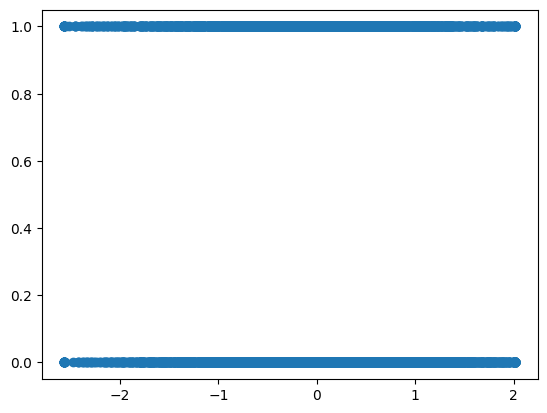

In [64]:
plt.scatter(internal_factors['communication_score'], divorce['divorced'])

The above shows the need for a logistic regression


Confusion Matrix:
[[838  65]
 [509  88]]


NameError: name 'internal_accuracy' is not defined

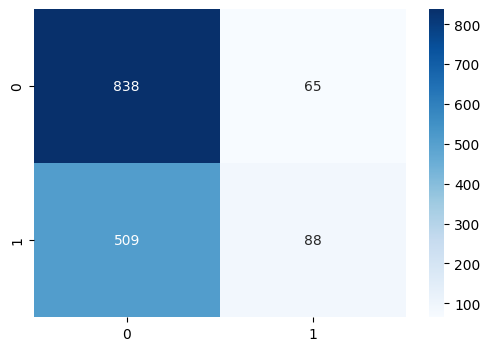

In [65]:
# Model 1: internal only
X_internal = internal_factors.drop(columns=['divorced'])
y = internal_factors['divorced']

X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(
    X_internal, y, test_size=0.3, random_state=42, stratify=y
)

# Build logistic regression model
log_reg_int = LogisticRegression()
log_reg_int.fit(X_train_int, y_train_int)

internal_coeficients = pd.Series(log_reg_int.coef_[0], index=X_internal.columns)

# Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred_i = log_reg_int.predict(X_test_int)
cm_i = confusion_matrix(y_test_int, y_pred_i)
print("\nConfusion Matrix:")
print(cm_i)


plt.figure(figsize=(6,4))
sns.heatmap(cm_i, annot=True, fmt='d', cmap='Blues')
plt.title(f'Internal Model\nAccuracy: {internal_accuracy:.3f}')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

from sklearn.metrics import accuracy_score
internal_accuracy = log_reg_int.score(X_test_int, y_test_int)

from sklearn.metrics import classification_report


print("=== MODEL 1: INTERNAL FACTORS ONLY ===")
print(f"Internal Factors Test Accuracy: {internal_accuracy:.3f}")

# Top 5 coefficients
print("\nTop 5 strongest internal predictors:")
print(internal_coeficients.abs().sort_values(ascending=False).head())



Confusion Matrix:
[[915   6]
 [574   5]]
=== MODEL 2: STRUCTURAL FACTORS ONLY ===
Test Accuracy: 0.613

Top 5 strongest structural predictors:
education_level_No Formal Education    0.240155
mental_health_issues                   0.196870
marriage_type_Other                    0.153472
employment_status_Part-time            0.143199
education_level_Bachelor               0.124984
dtype: float64


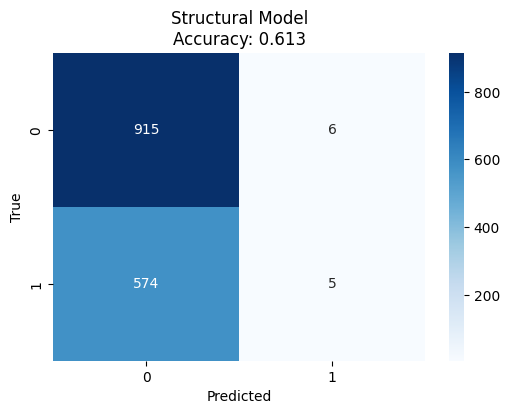

In [66]:
# Model 2: structural only
X_struct = structural_factors.drop(columns=['divorced'])
y = structural_factors['divorced']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_struct, y, test_size=0.3, random_state=42
)

logreg_struct = LogisticRegression()
logreg_struct.fit(X_train_s, y_train_s)

struct_accuracy = logreg_struct.score(X_test_s, y_test_s)
struct_coefs = pd.Series(logreg_struct.coef_[0], index=X_struct.columns)


# Confusion matrix
y_pred_s = logreg_struct.predict(X_test_s)
cm_s = confusion_matrix(y_test_s, y_pred_s)
print("\nConfusion Matrix:")
print(cm_s)

plt.figure(figsize=(6,4))
sns.heatmap(cm_s, annot=True, fmt='d', cmap='Blues')
plt.title(f'Structural Model\nAccuracy: {struct_accuracy:.3f}')
plt.ylabel('True')
plt.xlabel('Predicted')

print("=== MODEL 2: STRUCTURAL FACTORS ONLY ===")
print(f"Test Accuracy: {struct_accuracy:.3f}")

# Top 5 coefficients
print("\nTop 5 strongest structural predictors:")
print(struct_coefs.abs().sort_values(ascending=False).head())

=== MODEL 3: COMBINED FACTORS ===
Test Accuracy: 0.612

Top 5 strongest predictors (combined):
domestic_violence_history              0.693529
infidelity_occurred                    0.433853
education_level_No Formal Education    0.304520
mental_health_issues                   0.204375
conflict_resolution_style_Avoidant     0.164447
dtype: float64

Confusion Matrix:
[[541  52]
 [336  71]]


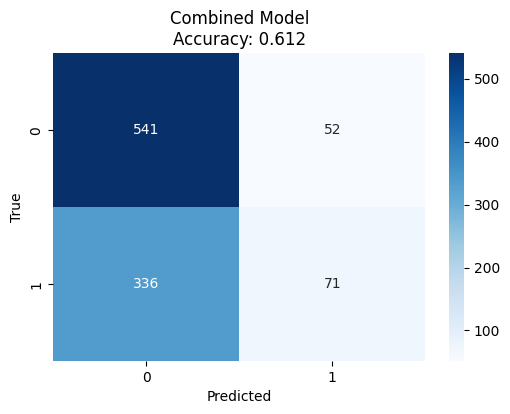

In [67]:
# Model 3: combined
combined_df = internal_factors.drop(columns=['divorced']).join(
    structural_factors.drop(columns=['divorced']),
    how='inner'
)
combined_df['divorced'] = internal_factors['divorced']  # same outcome

X_comb = combined_df.drop(columns=['divorced'])
y = combined_df['divorced']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_comb, y, test_size=0.2, random_state=42
)

logreg_comb = LogisticRegression()
logreg_comb.fit(X_train_c, y_train_c)

comb_accuracy = logreg_comb.score(X_test_c, y_test_c)
comb_coefs = pd.Series(logreg_comb.coef_[0], index=X_comb.columns)


print("=== MODEL 3: COMBINED FACTORS ===")
print(f"Test Accuracy: {comb_accuracy:.3f}")

# Top 5 coefficients
print("\nTop 5 strongest predictors (combined):")
print(comb_coefs.abs().sort_values(ascending=False).head())

# Confusion matrix
y_pred_c = logreg_comb.predict(X_test_c)
cm_c = confusion_matrix(y_test_c, y_pred_c)
print("\nConfusion Matrix:")
print(cm_c)

plt.figure(figsize=(6,4))
sns.heatmap(cm_c, annot=True, fmt='d', cmap='Blues')
plt.title(f'Combined Model\nAccuracy: {comb_accuracy:.3f}')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

### 7.2 MODEL

## internal model

In [ ]:
import statsmodels.formula.api as smf

model1 = smf.logit('divorced ~ communication_score+ infidelity_occurred + domestic_violence_history', 
                   data=internal_factors).fit()
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.663487
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               divorced   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4996
Method:                           MLE   Df Model:                            3
Date:                Tue, 16 Dec 2025   Pseudo R-squ.:                 0.01307
Time:                        04:49:42   Log-Likelihood:                -3317.4
converged:                       True   LL-Null:                       -3361.4
Covariance Type:            nonrobust   LLR p-value:                 6.259e-19
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.5200      0.033    -15.982      0.000      -0.

In [69]:
dev_null = -2*model1.llnull
dev = 2*-model1.llf
print(f'Deviance of the null model: {dev_null}')
print(f'Deviance of the fitted model: {dev}')

Deviance of the null model: 6722.7507652426675
Deviance of the fitted model: 6634.873843161304


In [70]:
from scipy.stats import chi2

# Compute chi-squared statistic
chi2_stat = dev_null - dev

# Compute degrees of freedom
df = model1.df_model

# Compute p-value
p_value = chi2.sf(chi2_stat, df)

print(f'Chi-squared statistic: {chi2_stat}')
print(f'Degrees of freedom: {df}')
print(f'p-value: {p_value}')

Chi-squared statistic: 87.87692208136377
Degrees of freedom: 3.0
p-value: 6.2590246877488925e-19


## structural model

In [71]:
model2 = smf.logit('divorced ~ mental_health_issues + education_level_PhD + social_support', 
                   data=structural_factors).fit()
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.670700
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               divorced   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4996
Method:                           MLE   Df Model:                            3
Date:                Tue, 16 Dec 2025   Pseudo R-squ.:                0.002343
Time:                        04:49:45   Log-Likelihood:                -3353.5
converged:                       True   LL-Null:                       -3361.4
Covariance Type:            nonrobust   LLR p-value:                  0.001275
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.4632      0.033    -13.982      0.000   

In [72]:
ev_null = -2*model2.llnull
dev2 = 2*-model2.llf
print(f'Deviance of the null model: {dev_null}')
print(f'Deviance of the fitted model: {dev}')

Deviance of the null model: 6722.7507652426675
Deviance of the fitted model: 6634.873843161304


In [73]:
from scipy.stats import chi2

# Compute chi-squared statistic
chi2_stat = dev_null - dev2

# Compute degrees of freedom
df = model2.df_model

# Compute p-value
p_value = chi2.sf(chi2_stat, df)

print(f'Chi-squared statistic: {chi2_stat}')
print(f'Degrees of freedom: {df}')
print(f'p-value: {p_value}')

Chi-squared statistic: 15.75151600762456
Degrees of freedom: 3.0
p-value: 0.0012750565639376914


The logistic regression output shown in the table indicates that the model is statistically significant:
LLR p-value: 0.001275
This value is obtained from the difference between the deviance of the baseline and the fitted models, which follows a Chi squared distribution

translate log odds coefficients into odds ratios and confidence intervals to understand the magnitude and direction of effects

In [ ]:
# coefficients and standard errors
params = model1.params
conf = model1.conf_int()
conf.columns = ['2.5%', '97.5%']

# odds ratios and CIs
or_internal = pd.DataFrame({
    'Odds Ratio': np.exp(params),
    'CI Lower': np.exp(conf['2.5%']),
    'CI Upper': np.exp(conf['97.5%']),
    'p-value': model1.pvalues
})

or_internal


,Odds Ratio,CI Lower,CI Upper,p-value
Intercept,0.594535,0.557807,0.633682,1.702828e-57
communication_score,0.855750,0.808096,0.906213,9.889700e-08
infidelity_occurred,1.544179,1.319231,1.807484,6.342336e-08
domestic_violence_history,2.075486,1.604234,2.685171,2.747142e-08


In [75]:
# interpret
# all factors are significant, have large effect sizes and little uncertatinty
# each one-unit increase in communication score is associated with a 15% reduction in the odds of divorce
# infidelity increases odds of divorce by 54%
# domestic violence history increases odds of divorce by over 200%

In [76]:
params = model2.params
conf = model2.conf_int()
conf.columns = ['2.5%', '97.5%']

or_structural = pd.DataFrame({
    'Odds Ratio': np.exp(params),
    'CI Lower': np.exp(conf['2.5%']),
    'CI Upper': np.exp(conf['97.5%']),
    'p-value': model2.pvalues
})

or_structural

,Odds Ratio,CI Lower,CI Upper,p-value
Intercept,0.629253,0.589692,0.671469,2.010383e-44
education_level_PhD[T.True],1.270316,0.970041,1.663542,8.205182e-02
mental_health_issues,1.206751,1.049704,1.387293,8.244934e-03
social_support,0.933652,0.882155,0.988155,1.771199e-02


In [77]:
# interpret
# structural factors have smaller effect sizes and more uncertainty
# PhD increases odds of divorce by 27% but not stattistically significant
# mental health issues increase odds of divorce by 21%
# social_support decreases odds of divorce by 7% 

Internal relationship factors are stronger, more precise, and more meaningful predictors of divorce than structural characteristics, even before accounting for the joint influence.

### Combined model

In [78]:
model3 = smf.logit('divorced ~ communication_score + infidelity_occurred + domestic_violence_history + mental_health_issues + social_support', 
                   data=combined_df).fit()
print(model3.summary())

Optimization terminated successfully.
         Current function value: 0.662094
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               divorced   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4994
Method:                           MLE   Df Model:                            5
Date:                Tue, 16 Dec 2025   Pseudo R-squ.:                 0.01514
Time:                        04:50:04   Log-Likelihood:                -3310.5
converged:                       True   LL-Null:                       -3361.4
Covariance Type:            nonrobust   LLR p-value:                 2.195e-20
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.5643      0.036    -15.668      0.000      -0.

In [79]:
dev_null = -2*model3.llnull
dev = 2*-model3.llf
print(f'Deviance of the null model: {dev_null}')
print(f'Deviance of the fitted model: {dev}')

Deviance of the null model: 6722.7507652426675
Deviance of the fitted model: 6620.940962978643


In [80]:
from scipy.stats import chi2

# Compute chi-squared statistic
chi2_stat = dev_null - dev2

# Compute degrees of freedom
df = model3.df_model

# Compute p-value
p_value = chi2.sf(chi2_stat, df)

print(f'Chi-squared statistic: {chi2_stat}')
print(f'Degrees of freedom: {df}')
print(f'p-value: {p_value}')

Chi-squared statistic: 15.75151600762456
Degrees of freedom: 5.0
p-value: 0.007590503686137757


In [ ]:
# coefficients and CIs 
params = model3.params
conf = model3.conf_int()
conf.columns = ['2.5%', '97.5%']

# OR table
or_combined = pd.DataFrame({
    'Odds Ratio': np.exp(params),
    'CI Lower': np.exp(conf['2.5%']),
    'CI Upper': np.exp(conf['97.5%']),
    'p-value': model3.pvalues
}).round(3)

or_combined

,Odds Ratio,CI Lower,CI Upper,p-value
Intercept,0.569,0.530,0.610,0.000
communication_score,0.853,0.806,0.904,0.000
infidelity_occurred,1.553,1.326,1.818,0.000
domestic_violence_history,2.069,1.599,2.678,0.000
mental_health_issues,1.232,1.070,1.418,0.004
social_support,0.934,0.882,0.989,0.019


log-likelihood ratio tests to see incremental value

In [ ]:
# fit structural only model
X_structural_only = sm.add_constant(structural_factors[['mental_health_issues', 'social_support']])
structural_model = sm.Logit(y, X_structural_only).fit()

# LLRT test
LL_combined = model3.llf
LL_structural = structural_model.llf
LR_stat = -2 * (LL_structural - LL_combined)
p_value = chi2.sf(LR_stat, df=model3.df_model - structural_model.df_model)

print('Likelihood Ratio Statistic:', LR_stat)
print('p-value:', p_value)


Optimization terminated successfully.
         Current function value: 0.671000
         Iterations 4
Likelihood Ratio Statistic: 89.05663377067049
p-value: 3.4927531814506505e-19


Adding the internal factors to the structural model significantly improves model fit.

In [ ]:
# add interactions here?

combined_df['comm_x_mental'] = combined_df['communication_score'] * combined_df['mental_health_issues']
combined_df['support_x_dv'] = combined_df['social_support'] * combined_df['domestic_violence_history']
combined_df['comm_x_infidelity'] = combined_df['communication_score'] * combined_df['infidelity_occurred']

# fit new logistic model with interactions
model3_interact = smf.logit(
    'divorced ~ communication_score + infidelity_occurred + domestic_violence_history + mental_health_issues + social_support + comm_x_mental + support_x_dv + comm_x_infidelity', 
    data=combined_df
).fit()

print(model3_interact.summary())


Optimization terminated successfully.
         Current function value: 0.661885
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               divorced   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4991
Method:                           MLE   Df Model:                            8
Date:                Tue, 16 Dec 2025   Pseudo R-squ.:                 0.01545
Time:                        05:19:46   Log-Likelihood:                -3309.4
converged:                       True   LL-Null:                       -3361.4
Covariance Type:            nonrobust   LLR p-value:                 6.797e-19
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.5651      0.036    -15.678      0.000      -0.

In [ ]:
# interactions are insignificant

In [ ]:
# visualising model effects of structural and internall factors
# e.g. probability of divorce with communication score at different levels of social support

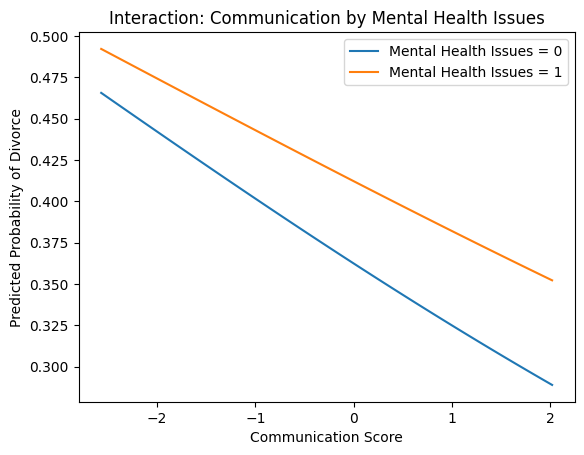

In [91]:
# e.g. probability of divorce by communication_score at low/high mental health issues


# Define range of communication scores
comm_range = np.linspace(combined_df['communication_score'].min(), combined_df['communication_score'].max(), 100)

# Create prediction datasets for mental_health low (0) and high (1)
X_pred_low = pd.DataFrame({
    'communication_score': comm_range,
    'mental_health_issues': 0,
    'domestic_violence_history': 0,
    'social_support': combined_df['social_support'].mean(),
    'infidelity_occurred': 0,
    'comm_x_mental': comm_range * 0,
    'support_x_dv': 0,
    'comm_x_infidelity': comm_range * 0
})

X_pred_high = X_pred_low.copy()
X_pred_high['mental_health_issues'] = 1
X_pred_high['comm_x_mental'] = comm_range * 1

# Predict probabilities
prob_low = model3_interact.predict(X_pred_low)
prob_high = model3_interact.predict(X_pred_high)

# Plot
plt.plot(comm_range, prob_low, label='Mental Health Issues = 0')
plt.plot(comm_range, prob_high, label='Mental Health Issues = 1')
plt.xlabel('Communication Score')
plt.ylabel('Predicted Probability of Divorce')
plt.title('Interaction: Communication by Mental Health Issues')
plt.legend()
plt.show()


In [ ]:
# interpret - agency and structure interact
# the protective effect of good communication is stronger when mental health issues are absent

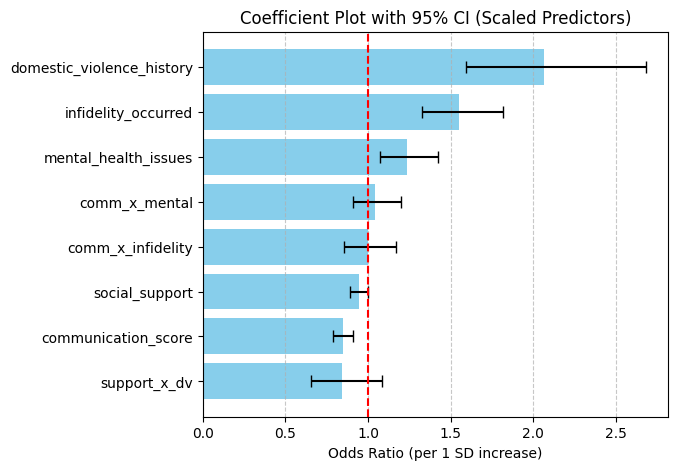

In [ ]:
# using combined model
params = model3_interact.params
conf = model3_interact.conf_int()
conf.columns = ['2.5%', '97.5%']

# df for coefficient plot
coef_df = pd.DataFrame({
    'Variable': params.index,
    'OR': np.exp(params.values),
    'CI_lower': np.exp(conf['2.5%']),
    'CI_upper': np.exp(conf['97.5%']),
    'p_value': model3_interact.pvalues
})

# dropping intercept
coef_df = coef_df[coef_df['Variable'] != 'Intercept'].reset_index(drop=True)

# sorting variables by OR magnitude 
coef_df = coef_df.sort_values('OR', ascending=True)

plt.figure(figsize=(6, 5))
plt.barh(coef_df['Variable'], coef_df['OR'], xerr=[coef_df['OR'] - coef_df['CI_lower'], 
                                                   coef_df['CI_upper'] - coef_df['OR']],
         color='skyblue', ecolor='black', capsize=4)
plt.axvline(1, color='red', linestyle='--')  # OR=1 reference line
plt.xlabel('Odds Ratio (per 1 SD increase)')
plt.title('Coefficient Plot with 95% CI (Scaled Predictors)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# compute marginal effects for communication_score
mfx = model3_interact.get_margeff(at='mean')  # at mean values of other variables
mfx.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:               divorced
Method:                          dydx
At:                              mean
=============================================================================================
                               dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
communication_score          -0.0398      0.008     -4.693      0.000      -0.056      -0.023
infidelity_occurred           0.1053      0.019      5.468      0.000       0.068       0.143
domestic_violence_history     0.1738      0.032      5.483      0.000       0.112       0.236
mental_health_issues          0.0503      0.017      2.925      0.003       0.017       0.084
social_support               -0.0141      0.007     -1.960      0.050      -0.028    2.49e-06
comm_x_mental                 0.0096      0.017      0.568      0.570      -0.024       0.043
support_x_dv                 -0.0407      0.031     -1.316      0.188      -0.101       0.020
comm_x_infidelity            -0.0003      0.019     -0.016      0.987      -0.038       0.037
=============================================================================================
"""

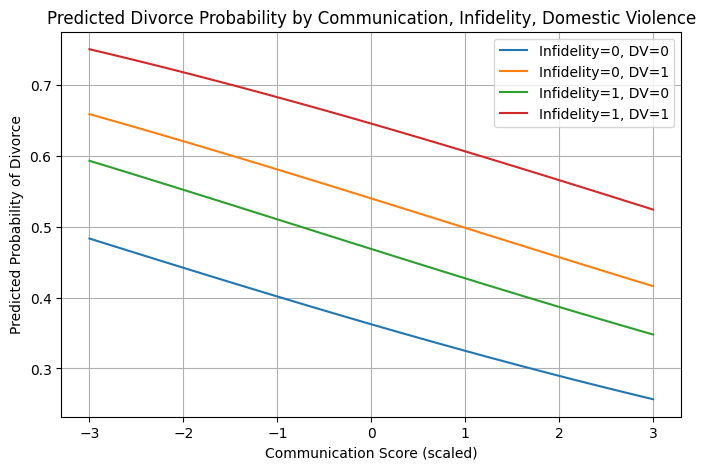

In [ ]:
# predictor range
comm_range = np.linspace(-3, 3, 100)

# df for all combinations of binary predictors
binary_combinations = pd.DataFrame([
    {'infidelity_occurred': inf, 'domestic_violence_history': dv}
    for inf in [0, 1]
    for dv in [0, 1]
])

# predicted probabilities
plt.figure(figsize=(8,5))
for idx, row in binary_combinations.iterrows():
    X_pred = pd.DataFrame({
        'communication_score': comm_range,
        'infidelity_occurred': row['infidelity_occurred'],
        'domestic_violence_history': row['domestic_violence_history'],
        'mental_health_issues': 0,  
        'social_support': 0,
        'comm_x_mental': comm_range * 0,
        'support_x_dv': 0,
        'comm_x_infidelity': comm_range * row['infidelity_occurred']
    })
    prob = model3_interact.predict(X_pred)
    label = f"Infidelity={row['infidelity_occurred']}, DV={row['domestic_violence_history']}"
    plt.plot(comm_range, prob, label=label)

plt.xlabel('Communication Score')
plt.ylabel('Predicted Probability of Divorce')
plt.title('Predicted Divorce Probability by Communication, Infidelity, Domestic Violence')
plt.legend()
plt.grid(True)
plt.show()
